# COVID-19 Prediction Hackathon

## Libraries
As always, we'll start by importing the necessary libraries.

In [43]:
import numpy as np
import pandas as pd

**Import Data**

In [3]:
# Import data
full_df = pd.read_csv("data/corona_tested_individuals_ver_006.english.csv")

C:\Users\corrac01\AppData\Local\Temp\ipykernel_13008\2782388287.py:2: DtypeWarning: Columns (7) have mixed types. Specify dtype option on import or set low_memory=False.
  full_df = pd.read_csv("data/corona_tested_individuals_ver_006.english.csv")


In [4]:
full_df

,test_date,cough,fever,sore_throat,shortness_of_breath,head_ache,corona_result,age_60_and_above,gender,test_indication
0,2020-04-30,0.0,0.0,0.0,0.0,0.0,negative,NaN,female,Other
1,2020-04-30,1.0,0.0,0.0,0.0,0.0,negative,NaN,female,Other
2,2020-04-30,0.0,1.0,0.0,0.0,0.0,negative,NaN,male,Other
3,2020-04-30,1.0,0.0,0.0,0.0,0.0,negative,NaN,female,Other
4,2020-04-30,1.0,0.0,0.0,0.0,0.0,negative,NaN,male,Other
...,...,...,...,...,...,...,...,...,...,...
278843,2020-03-11,0.0,0.0,0.0,0.0,0.0,negative,NaN,NaN,Other
278844,2020-03-11,0.0,0.0,0.0,0.0,0.0,negative,NaN,NaN,Other
278845,2020-03-11,0.0,0.0,0.0,0.0,0.0,positive,NaN,NaN,Contact with confirmed
278846,2020-03-11,0.0,0.0,0.0,0.0,0.0,other,NaN,NaN,Other


In [5]:
df_dropped = full_df.dropna(subset=['cough','fever','sore_throat','shortness_of_breath','head_ache'])

In [6]:
## Add "Unknown Category"
df_dropped['age_60_and_above'] = df_dropped['age_60_and_above'].fillna("Unknown")
df_dropped['gender'] = df_dropped['gender'].fillna("Unknown")

C:\Users\corrac01\AppData\Local\Temp\ipykernel_13008\1980986706.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_dropped['age_60_and_above'] = df_dropped['age_60_and_above'].fillna("Unknown")
C:\Users\corrac01\AppData\Local\Temp\ipykernel_13008\1980986706.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_dropped['gender'] = df_dropped['gender'].fillna("Unknown")


In [7]:
## Remove test results that aren't positive or negative
mask = df_dropped['corona_result'] == "other"
df_clean = df_dropped[~mask]

In [8]:
print(df_clean.shape)

(274702, 10)


## Feature Engineering

In [9]:
df_clean['test_date'] = pd.to_datetime(df_clean['test_date'])

C:\Users\corrac01\AppData\Local\Temp\ipykernel_13008\2190120057.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_clean['test_date'] = pd.to_datetime(df_clean['test_date'])


In [10]:
## Use Get Dummies from Pandas to onehotencode
df_clean = pd.get_dummies(df_clean, dtype=float)

In [11]:
df_clean

,test_date,cough,fever,sore_throat,shortness_of_breath,head_ache,corona_result_negative,corona_result_positive,age_60_and_above_No,age_60_and_above_Unknown,age_60_and_above_Yes,gender_Unknown,gender_female,gender_male,test_indication_Abroad,test_indication_Contact with confirmed,test_indication_Other
0,2020-04-30,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0,0.0,0.0,1.0
1,2020-04-30,1.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0,0.0,0.0,1.0
2,2020-04-30,0.0,1.0,0.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0,0.0,0.0,1.0,0.0,0.0,1.0
3,2020-04-30,1.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0,0.0,0.0,1.0
4,2020-04-30,1.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0,0.0,0.0,1.0,0.0,0.0,1.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
278842,2020-03-11,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0
278843,2020-03-11,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0
278844,2020-03-11,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0
278845,2020-03-11,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,1.0,0.0,1.0,0.0,0.0,0.0,1.0,0.0


In [12]:
## Combine the "high bias" features into a single sum
df_clean['High_bias_features_sum'] = df_clean['sore_throat'] + df_clean['shortness_of_breath'] + df_clean['head_ache']

For now we'll keep the individual features in there too, but we might want to drop them later. 

In [13]:
# This is our clean and processed full data set 
df_clean.head()

,test_date,cough,fever,sore_throat,shortness_of_breath,head_ache,corona_result_negative,corona_result_positive,age_60_and_above_No,age_60_and_above_Unknown,age_60_and_above_Yes,gender_Unknown,gender_female,gender_male,test_indication_Abroad,test_indication_Contact with confirmed,test_indication_Other,High_bias_features_sum
0,2020-04-30,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0,0.0,0.0,1.0,0.0
1,2020-04-30,1.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0,0.0,0.0,1.0,0.0
2,2020-04-30,0.0,1.0,0.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0
3,2020-04-30,1.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0,0.0,0.0,1.0,0.0
4,2020-04-30,1.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0


In [14]:
## Next define our X and y before moving to train_test_split stage

# X is everything except the results of the test (we'll use date for stratification then drop)
X = df_clean.drop(['corona_result_negative','corona_result_positive'], axis=1)

# y is a boolean of whether the test is positive
y = df_clean['corona_result_positive']

In [15]:
X.head()

,test_date,cough,fever,sore_throat,shortness_of_breath,head_ache,age_60_and_above_No,age_60_and_above_Unknown,age_60_and_above_Yes,gender_Unknown,gender_female,gender_male,test_indication_Abroad,test_indication_Contact with confirmed,test_indication_Other,High_bias_features_sum
0,2020-04-30,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0,0.0,0.0,1.0,0.0
1,2020-04-30,1.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0,0.0,0.0,1.0,0.0
2,2020-04-30,0.0,1.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0
3,2020-04-30,1.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0,0.0,0.0,1.0,0.0
4,2020-04-30,1.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0


## Visualisations

In [142]:
to_plot = X['test_date'].value_counts()

<AxesSubplot:xlabel='test_date'>

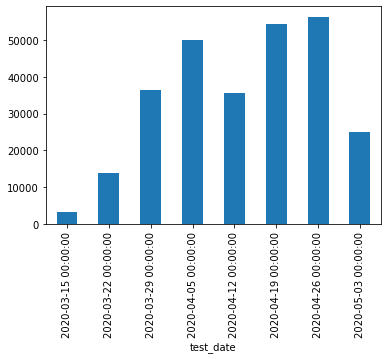

In [143]:
to_plot.resample("W").sum().plot.bar()

<AxesSubplot:>

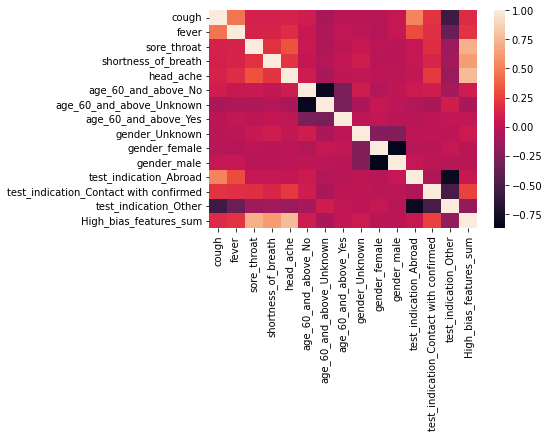

In [147]:
sns.heatmap(X_train.corr())

## Train Test Split

In [1]:
from sklearn.model_selection import train_test_split

In [16]:
X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.3, random_state=42, stratify = X['test_date'])

In [18]:
## Now we've stratified by date we can drop it
X_train = X_train.drop(['test_date'], axis=1)
X_test = X_test.drop(['test_date'], axis=1)

In [53]:
X_train.duplicated().sum()

191738

In [51]:
X_test.duplicated().sum()

81965

In [45]:
y_train.value_counts(normalize=True)

corona_result_positive
0.0    0.946441
1.0    0.053559
Name: proportion, dtype: float64

In [46]:
y_test.value_counts(normalize=True)

corona_result_positive
0.0    0.94667
1.0    0.05333
Name: proportion, dtype: float64

## Trying XGBoost

In [65]:
from sklearn.metrics import roc_auc_score, classification_report, confusion_matrix

In [26]:
from xgboost import XGBClassifier

### Benchmark to beat 

In [87]:
xgb = XGBClassifier(scale_pos_weight=1)

In [88]:
xgb.fit(X_train, y_train)

XGBClassifier(base_score=None, booster=None, callbacks=None,
              colsample_bylevel=None, colsample_bynode=None,
              colsample_bytree=None, device=None, early_stopping_rounds=None,
              enable_categorical=False, eval_metric=None, feature_types=None,
              gamma=None, grow_policy=None, importance_type=None,
              interaction_constraints=None, learning_rate=None, max_bin=None,
              max_cat_threshold=None, max_cat_to_onehot=None,
              max_delta_step=None, max_depth=None, max_leaves=None,
              min_child_weight=None, missing=nan, monotone_constraints=None,
              multi_strategy=None, n_estimators=None, n_jobs=None,
              num_parallel_tree=None, random_state=None, ...)

In [89]:
preds = xgb.predict(X_test)

In [90]:
roc_auc_score(preds,y_test)

0.8942728691007038

In [93]:
benchmark = classification_report(preds,y_test)

In [101]:
benchmark_Conf_mtx = confusion_matrix(y_test,preds)

Can see a decent chunk there of false negatives, which is not ideal. 
Thinking about ways to address this: 
- Could we undersample the negative test values? 
- Could we oversample from the positive test values? 

### Using Scale Pos Weight to force Recall up?

Issue is it craters precision at the same time. 

In [99]:
better_xgb = XGBClassifier(scale_pos_weight=0.1)
better_xgb.fit(X_train, y_train)
better_preds = better_xgb.predict(X_test)
print("ROC_AUC Score", roc_auc_score(preds,y_test))
print(classification_report(better_preds,y_test))
print(confusion_matrix(y_test,better_preds))

ROC_AUC Score 0.8942728691007038
              precision    recall  f1-score   support

           0       1.00      0.96      0.98     81451
           1       0.20      0.94      0.34       960

    accuracy                           0.96     82411
   macro avg       0.60      0.95      0.66     82411
weighted avg       0.99      0.96      0.97     82411

[[77955    61]
 [ 3496   899]]


In [100]:
print(benchmark)

              precision    recall  f1-score   support

           0       0.99      0.98      0.98     79252
           1       0.58      0.81      0.68      3159

    accuracy                           0.97     82411
   macro avg       0.79      0.89      0.83     82411
weighted avg       0.98      0.97      0.97     82411



In [102]:
print(benchmark_Conf_mtx)

[[77421   595]
 [ 1831  2564]]
